In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
from collections import Counter
Counter(y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [5]:
X_train_final = X_train.reshape(-1,784)
X_train_final.shape

(60000, 784)

In [6]:
X_test_final = X_test.reshape(-1,784)
X_test_final.shape

(10000, 784)

In [7]:
X_train_final = X_train_final / 255
X_test_final = X_test_final / 255

In [8]:
model = keras.Sequential()

# First Hidden Layer
model.add(keras.layers.Dense(512, input_shape= (784,), activation = 'relu'))
# Output Layer
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [9]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
results = model.fit(
    x = X_train_final,
    y = y_train,
    shuffle = True,
    epochs = 30,
    batch_size = 16,
    validation_data = (X_test_final, y_test)
)

Epoch 1/30
3750/3750 [==============================] - 15s 3ms/step - loss: 0.4684 - accuracy: 0.8791 - val_loss: 0.2832 - val_accuracy: 0.9221
Epoch 2/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2642 - accuracy: 0.9261 - val_loss: 0.2261 - val_accuracy: 0.9341
Epoch 3/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2150 - accuracy: 0.9402 - val_loss: 0.1920 - val_accuracy: 0.9436
Epoch 4/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1815 - accuracy: 0.9496 - val_loss: 0.1658 - val_accuracy: 0.9518
Epoch 5/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1578 - accuracy: 0.9559 - val_loss: 0.1479 - val_accuracy: 0.9576
Epoch 6/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1396 - accuracy: 0.9613 - val_loss: 0.1379 - val_accuracy: 0.9593
Epoch 7/30
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1251 - accuracy: 0.9658 - val_loss: 0.1282 - val_accuracy

In [12]:
eval = model.evaluate(x = X_test_final, y = y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9802


In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

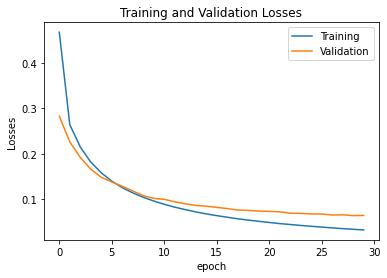

In [14]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

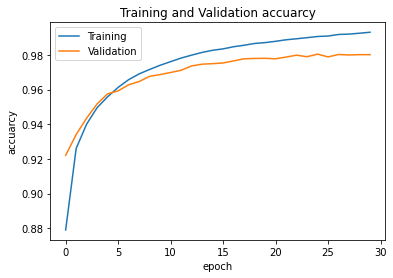

In [15]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
